In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("darkgrid")

In [3]:
data=pd.read_csv("onion_dataset.csv")

In [4]:
data.head()

,Growing Time,Dry Weight
0,1,16
1,2,33
2,3,65
3,4,97
4,5,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Growing Time  15 non-null     int64
 1   Dry Weight    15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [6]:
data.describe()

,Growing Time,Dry Weight
count,15.000000,15.000000
mean,8.000000,438.133333
std,4.472136,311.674250
min,1.000000,16.000000
25%,4.500000,109.000000
50%,8.000000,520.000000
75%,11.500000,675.000000
max,15.000000,989.000000


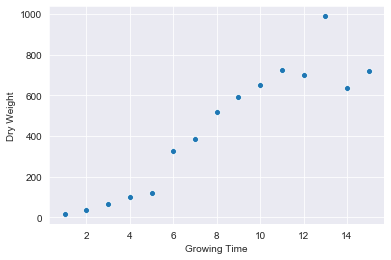

In [7]:
#step4: Data Visualization
sns.scatterplot(data['Growing Time'],data['Dry Weight'])

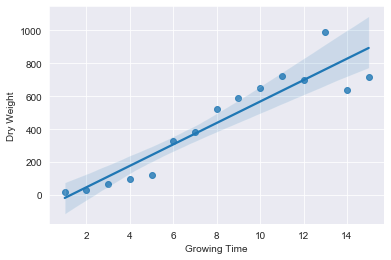

In [8]:
#linear line in the regression plot
sns.regplot(data['Growing Time'],data['Dry Weight'])

question: Do you think linear model is a good representative for the relationship? why and why not.
Answer: yes, the linear model will suit good for this dataset because while visualization the scatter regplot can notice how the line linearly separates the data.

In [9]:
#model building


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,classification_report
from sklearn.preprocessing import PolynomialFeatures

In [10]:
#select x & y variables, x is the independent variable and y is the dependent variable

x=data['Growing Time']
y=data['Dry Weight']

In [11]:
#perform train & test split with the x and y.

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)

In [12]:
#Before model building reshape the data

xtrain=xtrain.values.reshape(-1, 1)
ytrain=ytrain.values.reshape(-1, 1)
xtest=xtest.values.reshape(-1,1)
ytest=ytest.values.reshape(-1,1)

In [13]:
#Linear regression Model
#Model Initialization
linear_model=LinearRegression()
#Train Data fit in model.
linear_model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Train & Test score:

print("Train Score: ",linear_model.score(xtrain,ytrain))
print("Test Score: ",linear_model.score(xtest,ytest))

Train Score:  0.8583128933833811
Test Score:  0.8203030925738919


In [15]:
#polynomial Mdel with 2,3,4 Degree
#Degree assigned as 2
model1 = PolynomialFeatures(degree=2)
#Transform the X variable
x_trans = model1.fit_transform(xtrain)
x_test = model1.fit_transform(xtest)
#Fit the linear model
logistics_2= LinearRegression()
logistics_2.fit(x_trans,ytrain)

#Print the score of the model
print("Train Score for 2nd Degree: ",logistics_2.score(x_trans,ytrain))
print("Test Score for 2nd Degree: ",logistics_2.score(x_test,ytest))

Train Score for 2nd Degree:  0.9319464869061305
Test Score for 2nd Degree:  0.7996951261308362


In [16]:
#3rd degree polynomial feature
model2 = PolynomialFeatures(degree=3)
x_trans = model2.fit_transform(xtrain)
x_test = model2.fit_transform(xtest)
logistics_3= LinearRegression()
logistics_3.fit(x_trans,ytrain)
print("Train Score for 3rd Degree: ",logistics_3.score(x_trans,ytrain))
print("Test Score for 3rd Degree: ",logistics_3.score(x_test,ytest))

Train Score for 3rd Degree:  0.9748062470576107
Test Score for 3rd Degree:  0.8822723029256285


In [17]:
#4th degree
model3 = PolynomialFeatures(degree=4)
x_trans = model3.fit_transform(xtrain)
x_test = model3.fit_transform(xtest)
logistics_4= LinearRegression()
logistics_4.fit(x_trans,ytrain)
print("Train Score for 4th Degree: ",logistics_4.score(x_trans,ytrain))
print("Test Score for 4th Degree: ",logistics_4.score(x_test,ytest))

Train Score for 4th Degree:  0.992250000424344
Test Score for 4th Degree:  0.8316941071915699


By analysing all model accuracy score, we can go with linear regression because in that the model is righ fitted apart from that all polynomial models are over fitted.

In [18]:
#Step 6
#prediction with linear regression model
y_pred1 =linear_model.predict(xtest)
y_pred1

array([[717.98390805],
       [277.61609195],
       [112.47816092],
       [387.70804598],
       [167.52413793]])